Dataset is taken from Kaggle. It is Google-Play store dataset. 
The link of the dataset:
https://www.kaggle.com/gauthamp10/google-playstore-apps

This files contains Application data of more than 600K applications with the following 23 attributes.



# Descriptive Analysis of data

In [120]:
# Importing required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [121]:
import warnings
warnings.filterwarnings('ignore')

In [126]:
# Importing Google playstore data
Google_Playstore_apps = '/Users/rehanaquraishi/Downloads/Google-Playstore.csv'
df = pd.read_csv(Google_Playstore_apps)



In [127]:
# Editing the names of columns and replacing white space
for col in df.columns:
    col1 = col.replace(' ','')
    df = df.rename(columns={col:col1})
df.columns

Index(['AppName', 'AppId', 'Category', 'Rating', 'RatingCount', 'Installs',
       'MinimumInstalls', 'MaximumInstalls', 'Free', 'Price', 'Currency',
       'Size', 'MinimumAndroid', 'DeveloperId', 'DeveloperWebsite',
       'DeveloperEmail', 'Released', 'LastUpdated', 'ContentRating',
       'PrivacyPolicy', 'AdSupported', 'InAppPurchases', 'EditorsChoice',
       'ScrapedTime'],
      dtype='object')

In [128]:
# printing the total number of rows and columns
df.shape

(2312944, 24)

In [129]:
df.drop(['MinimumAndroid','ScrapedTime','EditorsChoice','AppId','DeveloperWebsite'], axis = 1, inplace = True)

In [130]:
df.shape

(2312944, 19)

In [131]:
print("Dataset information",df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2312944 entries, 0 to 2312943
Data columns (total 19 columns):
 #   Column           Dtype  
---  ------           -----  
 0   AppName          object 
 1   Category         object 
 2   Rating           float64
 3   RatingCount      float64
 4   Installs         object 
 5   MinimumInstalls  float64
 6   MaximumInstalls  int64  
 7   Free             bool   
 8   Price            float64
 9   Currency         object 
 10  Size             object 
 11  DeveloperId      object 
 12  DeveloperEmail   object 
 13  Released         object 
 14  LastUpdated      object 
 15  ContentRating    object 
 16  PrivacyPolicy    object 
 17  AdSupported      bool   
 18  InAppPurchases   bool   
dtypes: bool(3), float64(4), int64(1), object(11)
memory usage: 289.0+ MB
Dataset information None


In [132]:
df.isnull().sum()

AppName                 2
Category                0
Rating              22883
RatingCount         22883
Installs              107
MinimumInstalls       107
MaximumInstalls         0
Free                    0
Price                   0
Currency              135
Size                  196
DeveloperId            33
DeveloperEmail         31
Released            71053
LastUpdated             0
ContentRating           0
PrivacyPolicy      420953
AdSupported             0
InAppPurchases          0
dtype: int64

In [133]:
df['Size'].unique()

array(['10M', '2.9M', '3.7M', ..., '405M', '3.2k', '512M'], dtype=object)

In [134]:
df['Size'].nunique()

1657

In [135]:
df[df['Size'].isnull()]

,AppName,Category,Rating,RatingCount,Installs,MinimumInstalls,MaximumInstalls,Free,Price,Currency,Size,DeveloperId,DeveloperEmail,Released,LastUpdated,ContentRating,PrivacyPolicy,AdSupported,InAppPurchases
37031,Change The World Together: My Travel Friends V...,Education,NaN,NaN,1+,1.0,3,True,0.0,USD,NaN,My Travel Friends LLC,lauriezundel@gmail.com,NaN,"Nov 07, 2019",Everyone,http://mytravelfriends.com/privacy-policy,False,False
60487,Style Salon Premium App ( for demo purpose),Beauty,NaN,NaN,5+,5.0,5,True,0.0,USD,NaN,GoBony,support@gobony.in,NaN,"Aug 19, 2020",Everyone,https://www.gobony.in/privacy-policy,False,False
82844,Rolling Muse,Music & Audio,NaN,NaN,50+,50.0,59,True,0.0,USD,NaN,Sasha Stoikov,sashastoikov@gmail.com,NaN,"Jun 05, 2018",Everyone,https://www.rollingmuse.com/static/app/privacy...,False,False
83346,ArabiConnect Token,Finance,NaN,NaN,5+,5.0,5,True,0.0,USD,NaN,Arab Bank Plc.,rami.jibreel@arabbank.com.jo,NaN,"Oct 28, 2020",Everyone,http://www.arabbank.com,False,False
100136,Backyard Bash: New Match 3 Pet Game,Casual,NaN,NaN,"100,000+",100000.0,133062,True,0.0,USD,NaN,Big Fish Games,info@bigfishgames.com,NaN,"Aug 14, 2019",Everyone,https://www.bigfishgames.com/company/privacy.html,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2195259,기마병 이야기,Action,NaN,NaN,50+,50.0,61,True,0.0,USD,NaN,NAUTILUS GAMES,khwbaram@gmail.com,NaN,"Oct 09, 2020",Everyone,https://khwbaram.blogspot.com/2020/06/blog-pos...,False,False
2255272,The Journey Begins: My Travel Friends Volume 2,Education,NaN,NaN,1+,1.0,3,True,0.0,USD,NaN,My Travel Friends LLC,lauriezundel@gmail.com,NaN,"Nov 07, 2019",Everyone,http://mytravelfriends.com/privacy-policy,False,False
2284414,Advanced Interval Timer,Lifestyle,NaN,NaN,500+,500.0,648,True,0.0,USD,NaN,Chester SW,chester.software@gmail.com,NaN,"Apr 08, 2018",Everyone,http://chester-sw.com/privacy-timer.html,False,False
2288653,Dead Dawn,Role Playing,NaN,NaN,"10,000+",10000.0,29962,True,0.0,USD,NaN,StarsAmong,starsamong61@gmail.com,NaN,"Mar 10, 2021",Mature 17+,NaN,True,False


In [136]:
df.dropna(inplace=True)


In [137]:
df.isnull().sum()

AppName            0
Category           0
Rating             0
RatingCount        0
Installs           0
MinimumInstalls    0
MaximumInstalls    0
Free               0
Price              0
Currency           0
Size               0
DeveloperId        0
DeveloperEmail     0
Released           0
LastUpdated        0
ContentRating      0
PrivacyPolicy      0
AdSupported        0
InAppPurchases     0
dtype: int64

In [138]:
df.shape

(1834451, 19)

In [140]:
df['Rating'].unique()

array([0. , 4.4, 4.5, 2. , 4.7, 4.9, 3.9, 3.7, 4.2, 3.4, 3.8, 4.6, 4.1,
       2.5, 2.3, 2.1, 5. , 2.7, 4.3, 3.1, 4.8, 3.3, 4. , 2.4, 3.2, 3.6,
       2.6, 1.5, 3.5, 2.8, 3. , 2.9, 2.2, 1.8, 1.2, 1.7, 1.9, 1.4, 1.6,
       1. , 1.1, 1.3])

In [141]:
#Comparision between Rating and installs.
df1 = df.groupby("Rating")["Installs"].count()
df1.head(10)

Rating
0.0    832156
1.0       552
1.1       181
1.2       429
1.3       468
1.4       804
1.5       954
1.6      1298
1.7      1547
1.8      2361
Name: Installs, dtype: int64

In [142]:
df1.tail(10)

Rating
4.1    58095
4.2    72794
4.3    69162
4.4    71533
4.5    63356
4.6    63833
4.7    50309
4.8    48039
4.9    34038
5.0    75519
Name: Installs, dtype: int64

In [146]:
df['Currency'].unique()


array(['USD', 'XXX', 'EUR', 'INR', 'VND', 'GBP', 'KRW', 'TRY', 'SGD',
       'ZAR'], dtype=object)

In [148]:
df['Currency'].value_counts()


USD    1833574
XXX        859
EUR          6
INR          4
GBP          3
VND          1
KRW          1
TRY          1
SGD          1
ZAR          1
Name: Currency, dtype: int64

In [152]:
df[df['Currency'] == 'ZAR']


,AppName,Category,Rating,RatingCount,Installs,MinimumInstalls,MaximumInstalls,Free,Price,Currency,Size,DeveloperId,DeveloperEmail,Released,LastUpdated,ContentRating,PrivacyPolicy,AdSupported,InAppPurchases
1204066,DirtMe,Lifestyle,0.0,0.0,500+,500.0,600,True,0.0,ZAR,9.0M,DirtMe,dirtmanager47@gmail.com,"Jan 7, 2021","Jan 07, 2021",Teen,http://dirtme.com/privacy.html,False,False


In [153]:
df[df['Currency'] == 'SGD']


,AppName,Category,Rating,RatingCount,Installs,MinimumInstalls,MaximumInstalls,Free,Price,Currency,Size,DeveloperId,DeveloperEmail,Released,LastUpdated,ContentRating,PrivacyPolicy,AdSupported,InAppPurchases
1183120,Vedic Chant - Bhagavad Gita,Education,4.6,27.0,"5,000+",5000.0,9636,True,0.0,SGD,4.3M,Vikram Bodicherla,vikram.bodicherla@gmail.com,"Mar 28, 2021","Mar 29, 2021",Everyone,https://www.termsfeed.com/live/06f540d8-6f49-4...,False,False


In [154]:

df[df['Currency'] == 'TRY']


,AppName,Category,Rating,RatingCount,Installs,MinimumInstalls,MaximumInstalls,Free,Price,Currency,Size,DeveloperId,DeveloperEmail,Released,LastUpdated,ContentRating,PrivacyPolicy,AdSupported,InAppPurchases
1176749,Animated Always on Display,Personalization,4.1,169.0,"1,000+",1000.0,3257,True,0.0,TRY,14M,MultiLeveL Games,admin@multilevelgames.com,"Jan 14, 2017","Jan 25, 2021",Mature 17+,https://multilevelgames.com/aaod_PrivacyPolicy...,True,False


In [183]:
df['LastUpdated'].nunique()


3623

In [184]:
df['LastUpdated'].value_counts()

Jun 10, 2021    9844
Jun 11, 2021    9260
Jun 09, 2021    8927
Jun 14, 2021    8752
Jun 08, 2021    8610
                ... 
Apr 18, 2012       1
Jul 18, 2011       1
Sep 27, 2011       1
Dec 19, 2011       1
Jul 19, 2012       1
Name: LastUpdated, Length: 3623, dtype: int64

In [5]:
# seeing which app is paid
df[df['Free'] == False]

,AppName,AppId,Category,Rating,RatingCount,Installs,MinimumInstalls,MaximumInstalls,Free,Price,...,DeveloperWebsite,DeveloperEmail,Released,LastUpdated,ContentRating,PrivacyPolicy,AdSupported,InAppPurchases,EditorsChoice,ScrapedTime
273,Limitless Paint,com.bytescaffold.limitlesspaint,Tools,4.5,236.0,"10,000+",10000.0,34125,False,1.99,...,NaN,traista.rafael@yahoo.com,"Nov 30, 2018","Apr 08, 2019",Everyone,http://htmlpreview.github.io/?https://github.c...,False,False,False,2021-06-15 20:19:52
296,Standalone Golf GPS by Hole19,com.hole19golf.wear,Sports,2.8,160.0,"10,000+",10000.0,10407,False,4.99,...,https://www.hole19golf.com,help@hole19golf.com,"Feb 7, 2017","Dec 22, 2020",Everyone,https://www.hole19golf.com/terms/#PrivacyPolicy,False,False,False,2021-06-15 20:19:53
417,Calculator + Widget 21 themes,makatea.pro.calculator.widget,Tools,3.5,468.0,"10,000+",10000.0,12019,False,0.99,...,NaN,light.makatea@gmail.com,"Oct 4, 2012","Feb 09, 2014",Everyone,NaN,False,False,False,2021-06-15 20:20:00
554,莎士比亞11連環錯（英漢對照）,tw.com.mebook.generic4719180217042,Education,0.0,0.0,1+,1.0,2,False,2.99,...,http://www.mebook.com.tw,welcome@mail.soyong.com.tw,"Mar 15, 2017","Mar 15, 2017",Everyone,http://mobile.mebook-buy.com/android/privacy.html,False,False,False,2021-06-15 20:20:07
618,Theme Park Simulator,com.bestridesimulators.theme.park.simulator.game,Simulation,3.8,1158.0,"10,000+",10000.0,23644,False,0.99,...,http://bestridesimulators.com,cuentas.brs@gmail.com,"Nov 3, 2020","Feb 05, 2021",Everyone,https://bestridesimulators.com/lunaria-games-s-l/,True,True,False,2021-06-15 20:20:11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2312658,VA-Beast Essentials-2,com.planeth.vabeastessentials2,Music & Audio,4.5,19.0,"1,000+",1000.0,2686,False,1.99,...,http://www.planet-h.com/,gstomper@planet-h.com,"Jul 7, 2014","Oct 03, 2020",Everyone,https://www.planet-h.com/privacy/,False,False,False,2021-06-16 12:59:03
2312686,Blue Infinitum Theme - Dark,com.razerx.theme.blueinfinitum2,Personalization,4.7,165.0,"1,000+",1000.0,1554,False,1.49,...,NaN,razer.psn@gmail.com,"Nov 2, 2012","Sep 06, 2014",Everyone,NaN,False,False,False,2021-06-16 12:59:05
2312703,RPG Tears Revolude,kemco.wws.revolude,Role Playing,4.5,568.0,"5,000+",5000.0,6702,False,7.99,...,http://www.kemco.jp/,android@kemco.jp,"Jul 16, 2015","Jul 16, 2015",Teen,http://www.kemco.jp/app_pp/privacy.html,True,True,False,2021-06-16 12:59:06
2312803,New Cute Kitty Cats & Animals LOVE. WAStickerApps,com.wastickerapps.wasticker.sticker.emoji.new....,Entertainment,0.0,0.0,1+,1.0,3,False,0.99,...,https://sites.google.com/view/wastickerapps-wa...,wastickerappsstickers@gmail.com,"Feb 6, 2019","Feb 06, 2019",Everyone,https://sites.google.com/view/wastickerapps-wa...,False,False,False,2021-06-16 12:59:11


In [59]:
# checking the number of paid apps
df1 = df[df['Free'] == False]

,AppName,Category,Rating,RatingCount,Installs,MinimumInstalls,MaximumInstalls,Free,Price,Currency,Size,DeveloperId,DeveloperEmail,Released,LastUpdated,ContentRating,PrivacyPolicy,AdSupported,InAppPurchases
273,Limitless Paint,Tools,4.5,236.0,"10,000+",10000.0,34125,False,1.99,USD,1.6M,Bitscaffold,traista.rafael@yahoo.com,"Nov 30, 2018","Apr 08, 2019",Everyone,http://htmlpreview.github.io/?https://github.c...,False,False
296,Standalone Golf GPS by Hole19,Sports,2.8,160.0,"10,000+",10000.0,10407,False,4.99,USD,30M,Hole19,help@hole19golf.com,"Feb 7, 2017","Dec 22, 2020",Everyone,https://www.hole19golf.com/terms/#PrivacyPolicy,False,False
554,莎士比亞11連環錯（英漢對照）,Education,0.0,0.0,1+,1.0,2,False,2.99,USD,17M,Soyong Corp.,welcome@mail.soyong.com.tw,"Mar 15, 2017","Mar 15, 2017",Everyone,http://mobile.mebook-buy.com/android/privacy.html,False,False
618,Theme Park Simulator,Simulation,3.8,1158.0,"10,000+",10000.0,23644,False,0.99,USD,36M,Best Ride Simulators,cuentas.brs@gmail.com,"Nov 3, 2020","Feb 05, 2021",Everyone,https://bestridesimulators.com/lunaria-games-s-l/,True,True
637,Bukuu - Akibat Menipu,Education,0.0,0.0,1+,1.0,2,False,1.99,USD,30M,MMSC Ventures Sdn Bhd,bukuu.mmsc@gmail.com,"Jan 12, 2016","Jan 13, 2016",Everyone,https://www.mmsc.com.my/bukuu/terma-penggunaan...,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2312483,Swift Math Game PRO,Educational,4.2,5.0,10+,10.0,18,False,1.99,USD,2.5M,PedroRocha,pedrovqrocha@gmail.com,"Dec 13, 2016","Jan 26, 2019",Everyone,http://swiftmath.com.br/privacy-policy,False,False
2312628,Arduino 101 Kit,Education,0.0,0.0,5+,5.0,8,False,5.49,USD,11M,rabee2050,info@tatco.cc,"Nov 1, 2017","Apr 06, 2019",Everyone,https://sites.google.com/site/rabee2050/home/p...,False,False
2312658,VA-Beast Essentials-2,Music & Audio,4.5,19.0,"1,000+",1000.0,2686,False,1.99,USD,419k,planet-h.com,gstomper@planet-h.com,"Jul 7, 2014","Oct 03, 2020",Everyone,https://www.planet-h.com/privacy/,False,False
2312703,RPG Tears Revolude,Role Playing,4.5,568.0,"5,000+",5000.0,6702,False,7.99,USD,47M,KEMCO,android@kemco.jp,"Jul 16, 2015","Jul 16, 2015",Teen,http://www.kemco.jp/app_pp/privacy.html,True,True


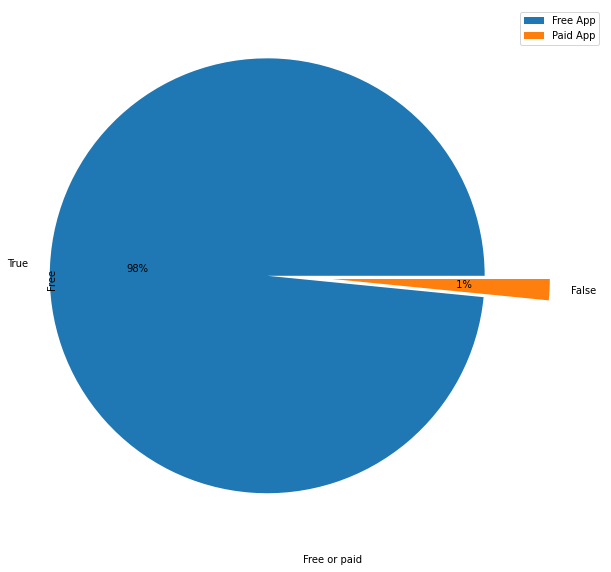

In [95]:
plt.figure(figsize=(10,10))
explode=[0.3,0]
df['Free'].value_counts().plot(kind='pie',autopct="%2i%%",explode=explode)
plt.legend(['Free App','Paid App'])
plt.xlabel('Free or paid')
plt.show()


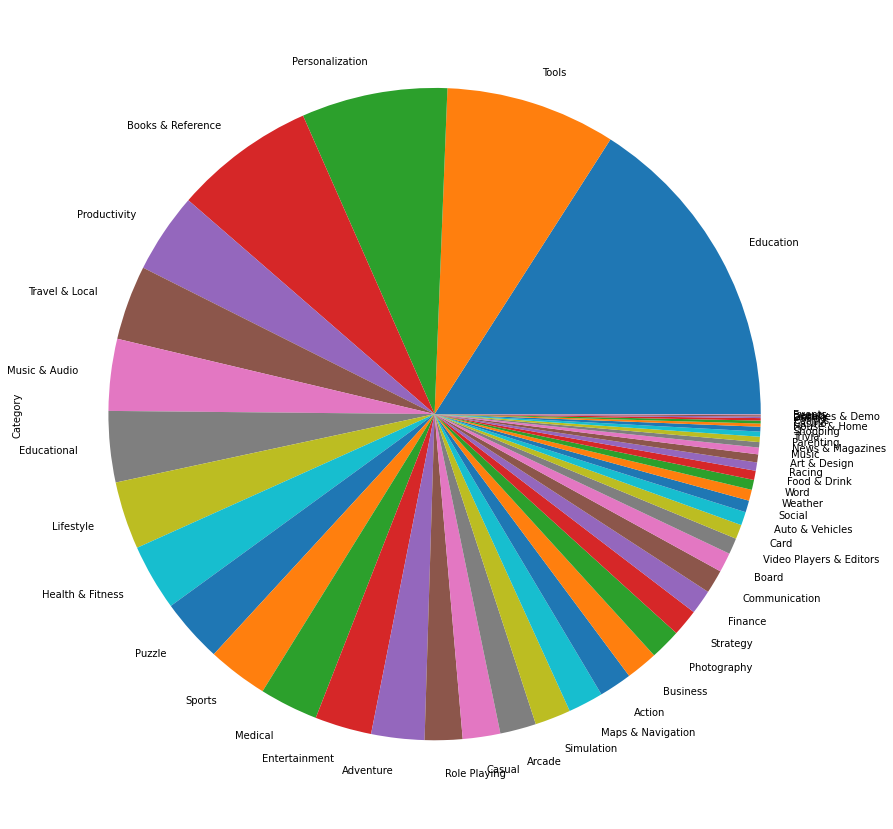

In [65]:
# Graph showing piechart of paid apps
plt.figure(figsize=(40,15))
df1['Category'].value_counts().plot(kind='pie')
plt.show()


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47]),
 [Text(0, 0, 'Action'),
  Text(1, 0, 'Adventure'),
  Text(2, 0, 'Arcade'),
  Text(3, 0, 'Art & Design'),
  Text(4, 0, 'Auto & Vehicles'),
  Text(5, 0, 'Beauty'),
  Text(6, 0, 'Board'),
  Text(7, 0, 'Books & Reference'),
  Text(8, 0, 'Business'),
  Text(9, 0, 'Card'),
  Text(10, 0, 'Casino'),
  Text(11, 0, 'Casual'),
  Text(12, 0, 'Comics'),
  Text(13, 0, 'Communication'),
  Text(14, 0, 'Dating'),
  Text(15, 0, 'Education'),
  Text(16, 0, 'Educational'),
  Text(17, 0, 'Entertainment'),
  Text(18, 0, 'Events'),
  Text(19, 0, 'Finance'),
  Text(20, 0, 'Food & Drink'),
  Text(21, 0, 'Health & Fitness'),
  Text(22, 0, 'House & Home'),
  Text(23, 0, 'Libraries & Demo'),
  Text(24, 0, 'Lifestyle'),
  Text(25, 0, 'Maps & Navigation'),
  Text(26, 0, 'Medical'),
  Text(27, 0, 'Musi

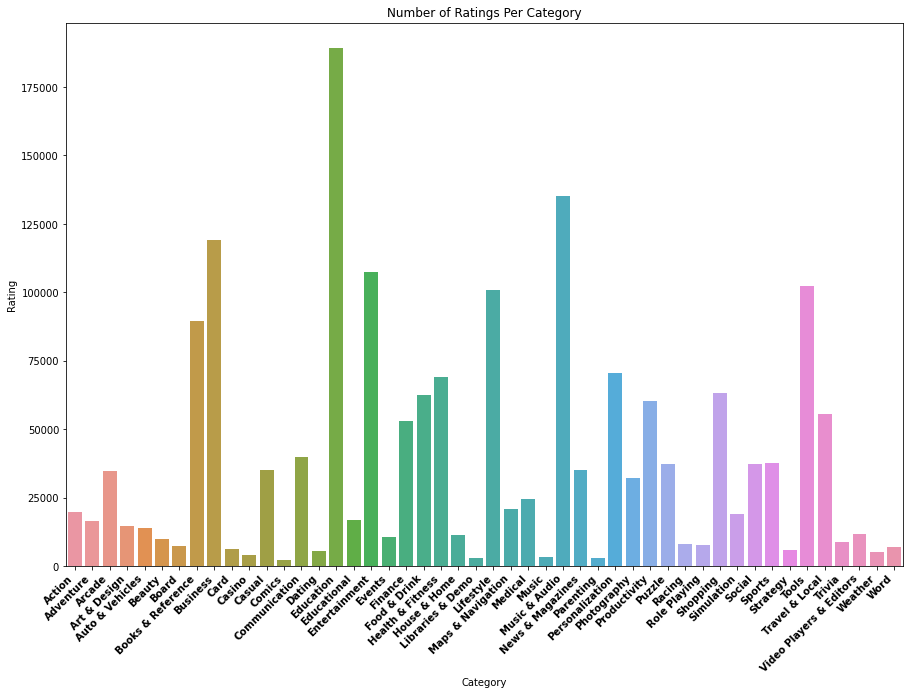

In [68]:
category_rating = df.groupby(['Category'])['RatingCount'].count()

plt.figure(figsize=(15,10))
sns.barplot(category_rating.index, category_rating.values)
plt.title('Number of Ratings Per Category')
plt.xlabel('Category')
plt.ylabel('Rating')
plt.xticks(fontsize=10,fontweight='bold',rotation=45,ha='right')

In [159]:
df['Category'].nunique()

48

In [171]:
dfg = df.groupby('Category')['Installs'].count()
dfg


Category
Action                      19941
Adventure                   16455
Arcade                      34876
Art & Design                14758
Auto & Vehicles             14084
Beauty                       9889
Board                        7439
Books & Reference           89408
Business                   119283
Card                         6302
Casino                       4153
Casual                      35132
Comics                       2280
Communication               39687
Dating                       5670
Education                  189095
Educational                 16842
Entertainment              107371
Events                      10626
Finance                     52987
Food & Drink                62379
Health & Fitness            68943
House & Home                11372
Libraries & Demo             3139
Lifestyle                  100834
Maps & Navigation           20796
Medical                     24524
Music                        3414
Music & Audio              135302
News 

In [52]:
# Showing the number of apps which has Inapp purchases
df['InAppPurchases'].value_counts()

False    2117635
True      195309
Name: InAppPurchases, dtype: int64

In [19]:
# Showing which app has Inapp purchases
df[df['InAppPurchases'] == True]['AppName'].value_counts()

Solitaire                       35
Sudoku                          35
Betting Tips                    34
Bubble Shooter                  33
Word Search                     24
                                ..
Learn Italian - 15,000 Words     1
Mushrooms app                    1
Страны мира - Вокруг света       1
Duress                           1
Hopeless 2: Cave Escape          1
Name: AppName, Length: 192354, dtype: int64

In [56]:
# showing who developed most apps
df['DeveloperEmail'].value_counts().head(5)

support@classplus.co          10345
appsupport@subsplash.com       7570
help@trainerize.com            4886
eng-android@chownow.com        4862
support@mindbodyonline.com     3047
Name: DeveloperEmail, dtype: int64

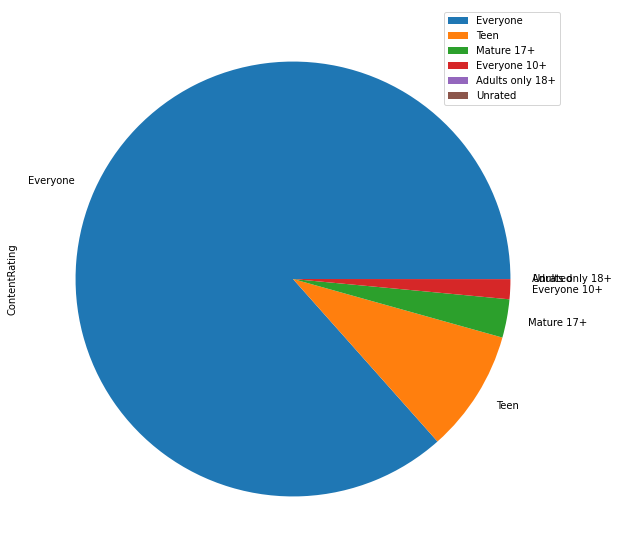

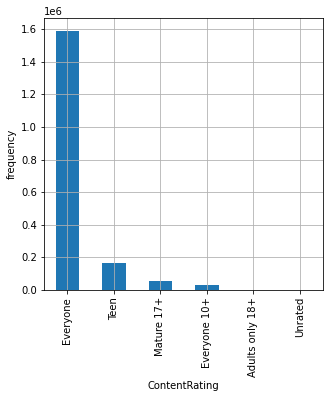

In [75]:
plt.figure(figsize=(40,10))
df['ContentRating'].value_counts().plot(kind='pie')
plt.legend()
plt.show()

plt.figure(figsize=(5,5))
df['ContentRating'].value_counts().plot(kind='bar')
plt.xlabel('ContentRating')
plt.ylabel('frequency')

plt.grid()
plt.show()

In [79]:
# Apps which has rating more than 4.0
df[(df['Rating'] > 4.0)]



,AppName,Category,Rating,RatingCount,Installs,MinimumInstalls,MaximumInstalls,Free,Price,Currency,Size,DeveloperId,DeveloperEmail,Released,LastUpdated,ContentRating,PrivacyPolicy,AdSupported,InAppPurchases
1,Ampere Battery Info,Tools,4.4,64.0,"5,000+",5000.0,7662,True,0.0,USD,2.9M,Webserveis,webserveis@gmail.com,"May 21, 2020","May 06, 2021",Everyone,https://dev4phones.wordpress.com/licencia-de-uso/,True,False
6,unlimited 4G data prank free app,Libraries & Demo,4.5,12.0,"1,000+",1000.0,2567,True,0.0,USD,2.5M,android developer779,aitomgharfatimezzahra@gmail.com,"Sep 23, 2019","Sep 27, 2019",Everyone,https://sites.google.com/view/unlimited4gdatap...,True,False
9,Neon 3d Iron Tech Keyboard Theme,Personalization,4.7,820.0,"50,000+",50000.0,62433,True,0.0,USD,3.5M,Free 2021 Themes for Emoji keyboard,trendyteme.888@gmail.com,"Sep 22, 2019","Oct 07, 2020",Everyone,http://bit.ly/EmojiThemePro,True,False
10,Dodge The Cars!,Racing,4.9,55.0,100+,100.0,329,True,0.0,USD,51M,MrScratch,mithalaarush@gmail.com,"Jul 30, 2020","Jul 30, 2020",Everyone,https://docs.google.com/document/d/1HTtvenbfLk...,False,False
15,Readymade Grocery App,Food & Drink,4.2,16.0,"1,000+",1000.0,4313,True,0.0,USD,12M,pietechsolution,info@ionicfirebaseapp.com,"Apr 5, 2020","Mar 23, 2021",Everyone,https://www.ionicfirebaseapp.com/contact,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2312909,Century College,Education,5.0,10.0,100+,100.0,230,True,0.0,USD,9.8M,Century College,support@readyeducation.com,"Aug 26, 2020","May 24, 2021",Everyone,https://www.readyeducation.com/privacy,False,False
2312919,Good Night Quotes,Personalization,4.8,5.0,100+,100.0,437,True,0.0,USD,10M,App Makerz,appmakerz526@gmail.com,"Aug 13, 2018","Oct 31, 2019",Teen,http://appsmakerz.blogspot.com/2018/09/privacy...,True,False
2312929,Murottal Muh Tha al Junayd Offline,Entertainment,4.4,23.0,"1,000+",1000.0,1783,True,0.0,USD,65M,Bunda Nino,missbundanino@gmail.com,"Oct 2, 2015","Apr 15, 2018",Everyone,https://docs.google.com/document/d/1AtSjUzTam2...,True,False
2312932,Hopeless 2: Cave Escape,Action,4.3,103466.0,"5,000,000+",5000000.0,7274660,True,0.0,USD,37M,Upopa Games,support@upopa.com,"Oct 29, 2015","Mar 06, 2017",Teen,http://www.upopa.com/games/hopeless2/privacypo...,True,True


In [98]:
df[df['Size']==df['Size'].max()]


,AppName,Category,Rating,RatingCount,Installs,MinimumInstalls,MaximumInstalls,Free,Price,Currency,Size,DeveloperId,DeveloperEmail,Released,LastUpdated,ContentRating,PrivacyPolicy,AdSupported,InAppPurchases
137,Grand Robot Lion Transform Simulator,Travel & Local,4.8,450.0,"100,000+",100000.0,152470,True,0.0,USD,Varies with device,Grand Robot Fight,grandrobotfight@gmail.com,"Jul 18, 2020","Dec 15, 2020",Teen,https://grandrobotfight.travel.blog/privacy-po...,True,True
140,Mega Ramps Car Stunts: Ultimate Races Car Games,Weather,4.2,149.0,"50,000+",50000.0,84421,True,0.0,USD,Varies with device,Vital Games Production,vitalgamesproduction@gmail.com,"Jul 30, 2019","Jul 16, 2020",Everyone,http://vitalgames.org/privacy.html,True,True
154,Visage Haunted House,Adventure,3.5,24.0,"1,000+",1000.0,4820,True,0.0,USD,Varies with device,RedMatrix,redmatrixstudio@gmail.com,"Jan 30, 2019","Apr 16, 2021",Teen,http://redmatrix.raveninteractive.io/privacy.html,True,False
180,Shop 13,Shopping,4.3,18.0,"1,000+",1000.0,2340,True,0.0,USD,Varies with device,Sahar Alizadehetemadi,info@131313.ir,"Jul 10, 2019","Jun 04, 2021",Everyone,http://131313.ir/policies/,False,False
182,"Swedish Game: Word Game, Vocabulary Game",Education,4.4,53.0,"10,000+",10000.0,12927,True,0.0,USD,Varies with device,Fun Word Games Studio,learn.vocabulary.game@gmail.com,"Oct 29, 2017","Sep 07, 2020",Everyone,http://chinhsachbaomatwordgame.blogspot.com/20...,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2312632,Extreme Police City Car Driving: GT Car Stunts,Racing,0.0,0.0,"1,000+",1000.0,1799,True,0.0,USD,Varies with device,Mind-Blowing Action Games,magfati@yahoo.com,"Jan 21, 2020","Jan 21, 2020",Teen,https://sites.google.com/view/mind-blowingacti...,True,False
2312651,learn&dev,Education,0.0,0.0,100+,100.0,290,True,0.0,USD,Varies with device,RATP Dev,support-learnanddev@ratpdev.com,"Apr 23, 2020","Mar 01, 2021",Everyone,https://s3-eu-west-1.amazonaws.com/public.bdz/...,False,False
2312677,Modern Strike : Multiplayer FPS - Critical Action,Role Playing,3.9,78351.0,"10,000,000+",10000000.0,24015387,True,0.0,USD,Varies with device,Enjoy.GameStudio.Fun,fun.game.jhon@gmail.com,"Aug 6, 2020","May 12, 2021",Teen,http://unity3d.com/cn/legal/privacy-policy,True,True
2312738,ForestFalcon,Business,0.0,0.0,10+,10.0,19,True,0.0,USD,Varies with device,MELD d.o.o.,info@meld.si,"Sep 2, 2020","Jun 01, 2021",Everyone,https://forestfalcon.com/privacy,False,False


In [100]:
df[df['Installs']==df['Installs'].max()]


,AppName,Category,Rating,RatingCount,Installs,MinimumInstalls,MaximumInstalls,Free,Price,Currency,Size,DeveloperId,DeveloperEmail,Released,LastUpdated,ContentRating,PrivacyPolicy,AdSupported,InAppPurchases
58082,PUBG MOBILE - Traverse,Action,4.3,37479011.0,"500,000,000+",500000000.0,505818718,True,0.0,USD,Varies with device,PROXIMA BETA,PUBGMOBILE_CS@tencentgames.com,"Mar 19, 2018","May 10, 2021",Teen,http://pubgmobile.proximabeta.com/privacy.html,True,True
90015,Pinterest,Lifestyle,4.6,8017109.0,"500,000,000+",500000000.0,615144909,True,0.0,USD,Varies with device,Pinterest,help@pinterest.com,"Aug 14, 2012","Jun 14, 2021",Teen,https://policy.pinterest.com/privacy-policy,True,False
115991,"Adobe Acrobat Reader: PDF Viewer, Editor & Cre...",Productivity,4.6,717313.0,"500,000,000+",500000000.0,604257328,True,0.0,USD,Varies with device,Adobe,acrobat-android-support@adobe.com,"May 24, 2010","Jun 09, 2021",Everyone,http://www.adobe.com/privacy/policy.html,False,True
160781,Google Lens,Tools,4.5,1050759.0,"500,000,000+",500000000.0,749482169,True,0.0,USD,Varies with device,Google LLC,apps-help@google.com,"Jun 4, 2018","Nov 30, 2020",Everyone,http://www.google.com/policies/privacy/,False,False
166556,Sniper 3D: Fun Free Online FPS Shooting Game,Action,4.4,1285629.0,"500,000,000+",500000000.0,518325903,True,0.0,USD,136M,Fun Games For Free,support+sniper3d@fungames-forfree.com,"Nov 13, 2014","Jun 04, 2021",Mature 17+,https://www.fungames-forfree.com/games/sniper3...,True,True
204725,Phone by Google - Caller ID & Spam Protection,Tools,4.5,1475344.0,"500,000,000+",500000000.0,746756536,True,0.0,USD,Varies with device,Google LLC,apps-help@google.com,"Dec 7, 2015","Jun 04, 2021",Everyone,http://www.google.com/policies/privacy,False,False
244319,Garena Free Fire - Rampage,Action,4.2,89177097.0,"500,000,000+",500000000.0,976536041,True,0.0,USD,Varies with device,GARENA INTERNATIONAL I PRIVATE LIMITED,freefire@garena.com,"Dec 7, 2017","Jun 04, 2021",Mature 17+,https://ff.garena.com/others/policy/en/,False,True
289450,MX Player,Video Players & Editors,4.2,10655017.0,"500,000,000+",500000000.0,957838565,True,0.0,USD,Varies with device,MX Media (formerly J2 Interactive),support@mxplayer.in,"Jul 18, 2011","Jun 09, 2021",Everyone,https://sites.google.com/site/mxvpen/about/pri...,True,False
323766,My Talking Angela,Casual,4.2,13083889.0,"500,000,000+",500000000.0,699944379,True,0.0,USD,115M,Outfit7 Limited,support@outfit7.com,"Dec 3, 2014","May 25, 2021",Everyone,http://outfit7.com/privacy/,True,True
365191,Calculator,Tools,4.4,211550.0,"500,000,000+",500000000.0,783335747,True,0.0,USD,Varies with device,Xiaomi Inc.,micalculator.xiaomi@gmail.com,"Aug 31, 2017","Dec 24, 2020",Everyone,http://www.mi.com/en/about/privacy/,False,False


In [27]:
# No. of Apps according to content
df['ContentRating'].value_counts()


Everyone           2022089
Teen                196375
Mature 17+           60289
Everyone 10+         33901
Unrated                154
Adults only 18+        136
Name: ContentRating, dtype: int64

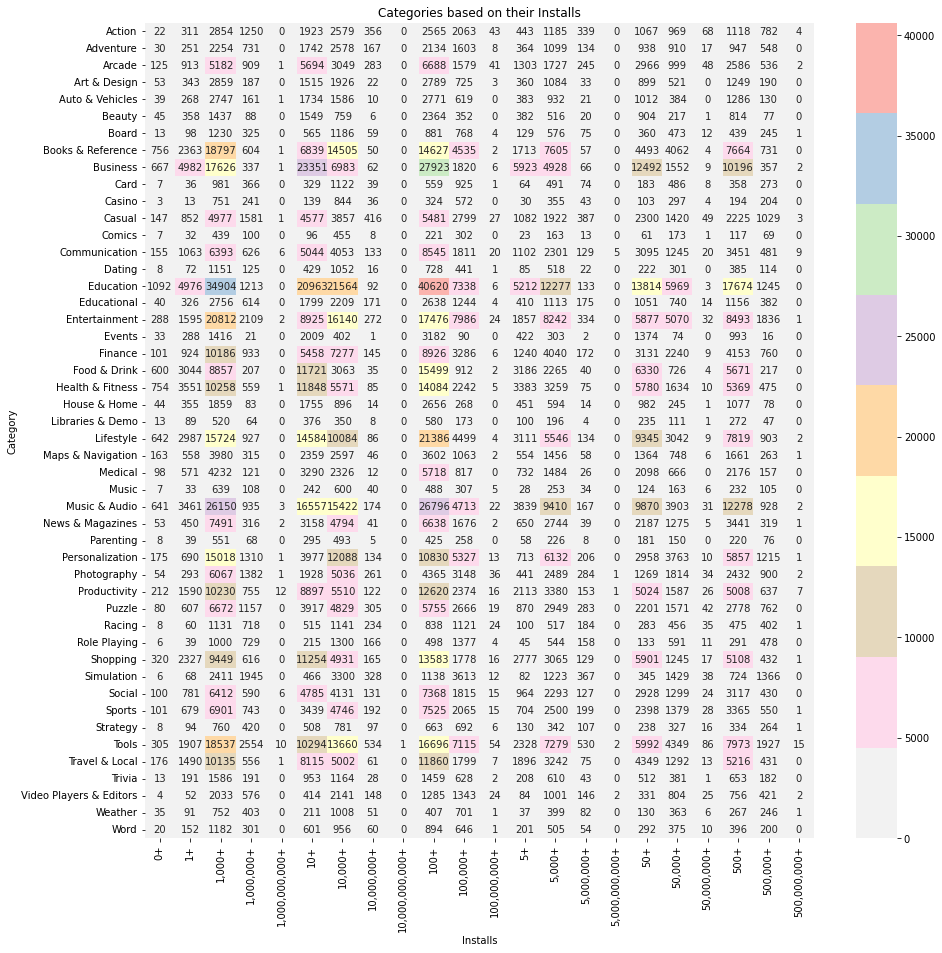

In [176]:
# Categories based on their Installs
plt.figure(figsize=(15,15))
plt.title("Categories based on their Installs")
sns.heatmap(pd.crosstab(df['Category'], df["Installs"]),annot=True,fmt='g', cmap="Pastel1_r");
plt.show()

In [177]:
df.describe()

,Rating,RatingCount,MinimumInstalls,MaximumInstalls,Price
count,1.834451e+06,1.834451e+06,1.834451e+06,1.834451e+06,1.834451e+06
mean,2.236023e+00,3.312923e+03,2.095357e+05,3.658498e+05,9.417220e-02
std,2.099076e+00,2.193176e+05,1.562247e+07,2.407219e+07,2.535748e+00
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.000000e+00,0.000000e+00,1.000000e+02,1.000000e+02,0.000000e+00
50%,3.100000e+00,6.000000e+00,5.000000e+02,8.310000e+02,0.000000e+00
75%,4.300000e+00,4.800000e+01,5.000000e+03,8.945000e+03,0.000000e+00
max,5.000000e+00,1.385576e+08,1.000000e+10,1.205763e+10,4.000000e+02
